In [1]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

## Importar Datos

In [3]:
#Importamos el dataframe de airbnbs en nueva york
df=pd.read_csv("C:/Users/Sebastián/Downloads/listings (2).csv/listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20230605012709,2023-06-05,city scrape,Rental unit in New York · ★4.68 · Studio · 1 b...,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,within a day,71%,22%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",t,t,"New York, United States",Midtown,Manhattan,40.753560,-73.985590,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Dedicated workspace"", ""Baking sheet"", ""Extra...",$240.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,19,20,50,325,2023-06-05,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,NaN,f,3,3,0,0,0.30
1,5121,https://www.airbnb.com/rooms/5121,20230605012709,2023-06-05,previous scrape,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, NY","I am an artist(painter, filmmaker) and curato...",within a day,90%,71%,NaN,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,2.0,2.0,"['email', 'phone']",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.685350,-73.955120,Private room in rental unit,Private room,2,NaN,NaN,NaN,1.0,"[""Kitchen"", ""Heating"", ""Air conditioning"", ""Wi...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,0,0,0,0,2023-06-05,50,0,0,2009-05-28,2019-12-02,4.52,4.22,4.09,4.91,4.91,4.47,4.52,NaN,f,2,0,2,0,0.29
2,14991,https://www.airbnb.com/rooms/14991,20230605012709,2023-06-05,city scrape,Rental unit in New York · ★4.93 · 1 bedroom · ...,Room for rent in my Manhattan apartment. The a...,NaN,https://a0.muscache.com/pictures/56919050/b99e...,59023,https://www.airbnb.com/users/show/59023,Bianca,2009-12-01,"New York, NY","I am dancer, choreographer, Pilates teacher an...",within a day,90%,58%,NaN,https://a0.muscache.com/im/pictures/user/68b9c...,https://a0.muscache.com/im/pictures/user/68b9c...,Lower East Side,1.0,3.0,"['email', 'phone']",t,t,NaN,Lower East Side,Manhattan,40.722070,-73.989760,Private room in rental unit,Private room,1,NaN,1 bath,NaN,1.0,"[""Air conditioning"", ""Refrigerator"", ""Elevator...",$120.00,5,15,5.0,5.0,15.0,15.0,5.0,15.0,NaN,t,6,6,6,268,2023-06-05,22,3,1,2010-03-21,2023-05-14,4.93,4.92,4.92,4.92,4.92,4.92,4.85,NaN,f,1,0,1,0,0.14
3,5136,https://w

In [4]:
#Evaluamos la estructura del dataframe
df.shape

(43566, 75)

In [5]:
#Vemos los tipos de datos y la cantidad de datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43566 entries, 0 to 43565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            43566 non-null  int64  
 1   listing_url                                   43566 non-null  object 
 2   scrape_id                                     43566 non-null  int64  
 3   last_scraped                                  43566 non-null  object 
 4   source                                        43566 non-null  object 
 5   name                                          43566 non-null  object 
 6   description                                   42866 non-null  object 
 7   neighborhood_overview                         25201 non-null  object 
 8   picture_url                                   43566 non-null  object 
 9   host_id                                       43566 non-null 

In [6]:
aux=df.isnull().sum().reset_index()
aux=aux.rename(columns={0:'valores_faltantes'})
aux=aux[aux['valores_faltantes']>0]
aux['porcentaje_faltante']=aux['valores_faltantes']/df.shape[0]
aux
#Las siguientes columnas tienen valores faltantes, hay varias columnas que no sirven para el analisis puesto que tienen el 100% de los registros faltantes.

,index,valores_faltantes,porcentaje_faltante
6,description,700,0.016068
7,neighborhood_overview,18365,0.421544
11,host_name,5,0.000115
12,host_since,5,0.000115
13,host_location,9350,0.214617
14,host_about,19485,0.447252
15,host_response_time,13976,0.320801
16,host_response_rate,13976,0.320801
17,host_acceptance_rate,12759,0.292866
18,host_is_superhost,15167,0.348138


In [7]:
df.describe().T
#Con la funcion previa vemos estadisticas descriptivas a nivel alto

,count,mean,std,min,25%,50%,75%,max
id,43566.0,2.582283e+17,3.605864e+17,2.595000e+03,2.021553e+07,4.561689e+07,6.797858e+17,9.059818e+17
scrape_id,43566.0,2.023061e+13,1.703535e+01,2.023061e+13,2.023061e+13,2.023061e+13,2.023061e+13,2.023061e+13
host_id,43566.0,1.559275e+08,1.655706e+08,1.678000e+03,1.647671e+07,7.846297e+07,2.789252e+08,5.180219e+08
host_listings_count,43561.0,1.186814e+02,5.975472e+02,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,4.746000e+03
host_total_listings_count,43561.0,1.828195e+02,8.687675e+02,1.000000e+00,1.000000e+00,3.000000e+00,8.000000e+00,8.918000e+03
latitude,43566.0,4.072868e+01,5.756369e-02,4.050031e+01,4.068765e+01,4.072452e+01,4.076275e+01,4.091138e+01
longitude,43566.0,-7.394392e+01,5.633615e-02,-7.424984e+01,-7.398199e+01,-7.395272e+01,-7.392415e+01,-7.371087e+01
accommodates,43566.0,2.962700e+00,2.123375e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,25073.0,1.592909e+00,9.227462e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.600000e+01


## Punto 1: Analisis Inicial de los Datos

Variables de host, host image y demas no son relavantes para nuestro analisis, por lo tanto las eliminaremos.

In [8]:
#Eliminamos las columnas que consideramos que no tendrán ningún valor predictivo
df=df.drop(columns=['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified','bathrooms', 'calendar_updated','license'])

In [85]:
import pandas as pd
import ipywidgets
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

from pandas_profiling import ProfileReport

aux=ProfileReport(df)
aux.to_file(output_file="analisis_inicial.html")




  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 663.4/663.4 kB 6.0 MB/s eta 0:00:00
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
     -------------------------------------- 152.1/152.1 kB 1.5 MB/s eta 0:00:00
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py

C:\Users\Sebastián\AppData\Local\Temp\ipykernel_10344\4184777334.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Limpiamos los datos de precio para que esten en formato numerico
df['price']=df['price'].str.replace("[$,]", "", regex=True).astype(float)


In [11]:
#Exploramos un poco la variable de precio
df['price'].describe()

count    43566.000000
mean       225.216109
std        818.738268
min          0.000000
25%         80.000000
50%        136.000000
75%        228.000000
max      90120.000000
Name: price, dtype: float64

Dado que el cliente busca maximizar retornos debemos ver que tipos de hospedajes generarn mayor cantidad de ingresos (Revenue). Por lo tanto, calculamos estas nuevas variables de ingresos esperados de los proximos 30 dias y el ingreso esperado de los proximos 60 dias. Estas variables guiarán el resto del análisis.

In [12]:
#Calculmaos las variables de ingresos
df['revenue_60']=df['price']*(60-df['availability_60'])
df['revenue_30']=df['price']*(30-df['availability_30'])

Text(0, 0.5, 'Frecuencia')

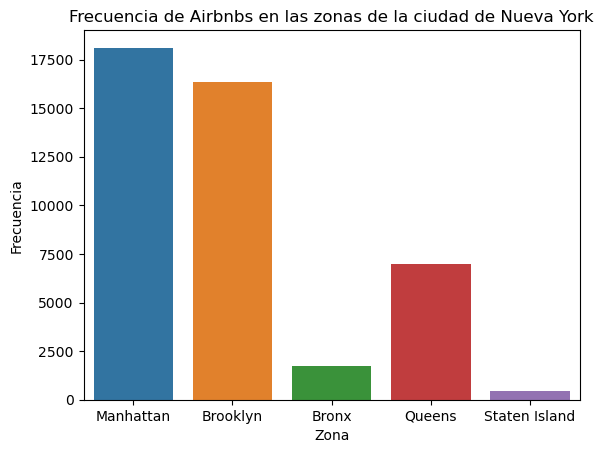

In [13]:
sns.countplot(df,x='neighbourhood_group_cleansed')
plt.title('Frecuencia de Airbnbs en las zonas de la ciudad de Nueva York')
plt.xlabel('Zona')
plt.ylabel('Frecuencia')
#Primero graficamos las zonas de Nueva York para ver donde hay mayor cantidad de oferta

Text(0, 0.5, 'Frecuencia')

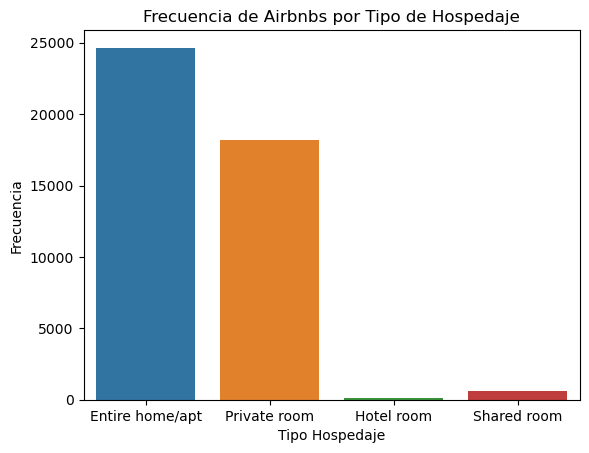

In [14]:

sns.countplot(df,x='room_type')
plt.title('Frecuencia de Airbnbs por Tipo de Hospedaje')
plt.xlabel('Tipo Hospedaje')
plt.ylabel('Frecuencia')
#Despues graficamos la frecuencia de airbnbs por tipo de hospedaje

Text(0, 0.5, 'Cantidad de Hospedajes')

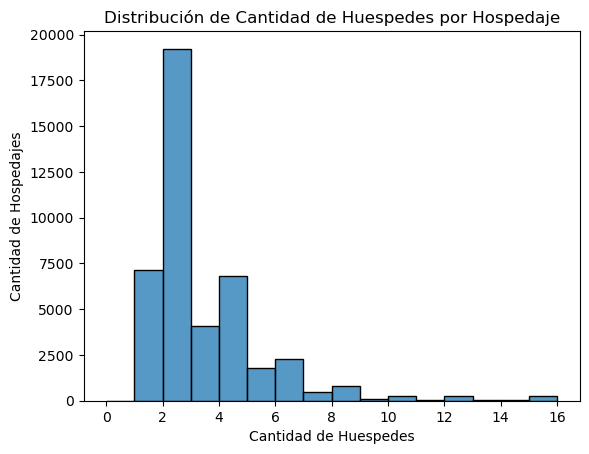

In [15]:
#Graficamos la cantidad de huespedes por hospedaje 
sns.histplot(df,x='accommodates',binwidth=1)
plt.title('Distribución de Cantidad de Huespedes por Hospedaje')
plt.xlabel('Cantidad de Huespedes')
plt.ylabel('Cantidad de Hospedajes')

Text(0, 0.5, 'Cantidad de Hospedajes')

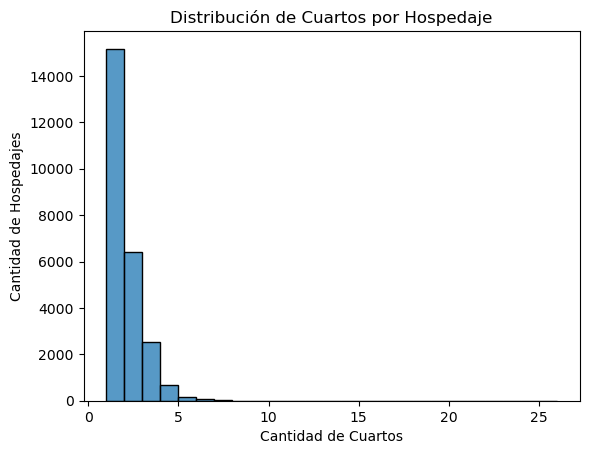

In [72]:
#Cantidad de cuartos por hospedaje
sns.histplot(df,x='bedrooms',binwidth=1)
plt.title('Distribución de Cuartos por Hospedaje')
plt.xlabel('Cantidad de Cuartos')
plt.ylabel('Cantidad de Hospedajes')

Creamos la siguiente función para limpiar la data de los baños

In [17]:
def transform_bathroom_description(bathroom_array):
    
    bathroom_mapping = {
        'Half-bath': 0.5,
        'Private half-bath': 0.5,
        'Shared half-bath': 0.5,
    }
    
    
    valores_transformados = []

    for description in bathroom_array:
        if isinstance(description, str):
            if description in bathroom_mapping:
                valores_transformados.append(bathroom_mapping[description])
            else:
                import re
                match = re.search(r'(\d+\.\d+|\d+)', description)
                if match:
                    numeric_part = float(match.group(0))
                    valores_transformados.append(numeric_part)
                else:
                    valores_transformados.append(0)
        else:
            valores_transformados.append(np.nan)

    return valores_transformados

df['banos_final']=transform_bathroom_description(df['bathrooms_text'])

Text(0, 0.5, 'Cantidad de Hospedajes')

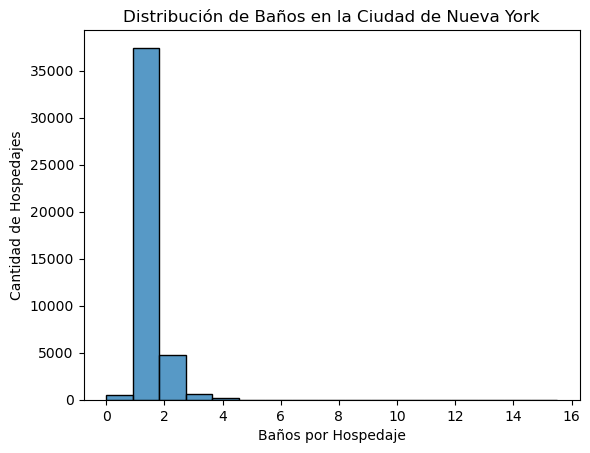

In [18]:
#Graficamos la distribución de los baños de los hospedajes de la ciudad de Nueva York
sns.histplot(df,x='banos_final')
plt.title('Distribución de Baños en la Ciudad de Nueva York')
plt.xlabel('Baños por Hospedaje')
plt.ylabel('Cantidad de Hospedajes')

Text(0, 0.5, 'Cantidad de Hospedajes')

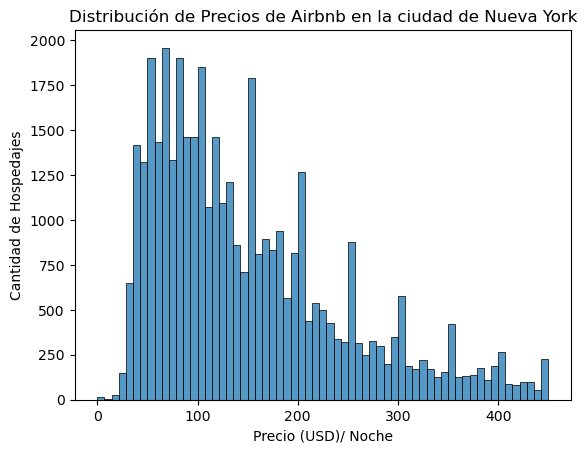

In [19]:
#Distribución de precios de los hospedajes de airbnb
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
rango_inter_cuartil = q3 - q1

sns.histplot(df.loc[df["price"] <= (q3 + 1.5 * rango_inter_cuartil)],x='price')
plt.title('Distribución de Precios de Airbnb en la ciudad de Nueva York')
plt.xlabel('Precio (USD)/ Noche')
plt.ylabel('Cantidad de Hospedajes')


Text(0.5, 1.0, 'Distribución de Ingresos Estimados de Airbnb en la ciudad de Nueva York')

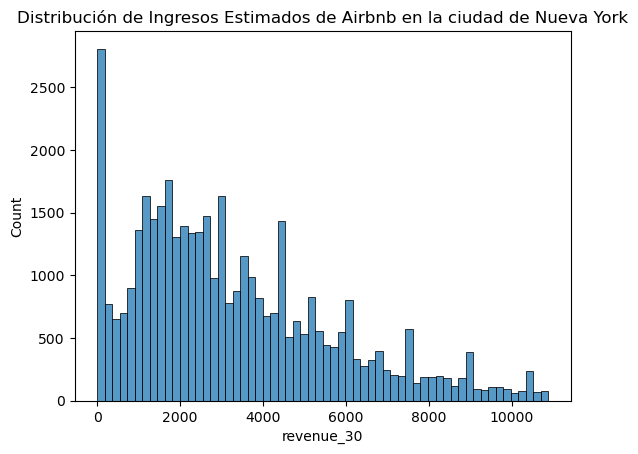

In [20]:
#Distribución de los ingresos estimados de Airbnb
q1 = df["revenue_30"].quantile(0.25)
q3 = df["revenue_30"].quantile(0.75)
rango_inter_cuartil = q3 - q1
sns.histplot(df.loc[df["revenue_30"] <= (q3 + 1.5 * rango_inter_cuartil)],x='revenue_30')
plt.title('Distribución de Ingresos Estimados de Airbnb en la ciudad de Nueva York')

## Punto 2: Estrategia de Análisis

Dado que lo que buscamos es encontrar la combinación de características que maximizan los ingresos, analizaremos 6 variables principales que muy probablemente impactan la cantidad de ingresos que busca el cliente. Se utilizarán gráficas dependiendo del tipo de dato a analizar, métricas estadísticas y finalmente se llegará a una conclusión para cada variable.

1. Primero, definiremos la métrica principal que son los ingresos esperados. Esta métrica combina el precio del hospedeja con la disponibilidad del hospedaje. Lo calcularemos como (30-availability_30)*precio. Esto nos dará los ingresos esperados del próximo mes, que es justo lo que busca el cliente, una relación entre la disponibilidad y el precio del hospedaje.
2. Después, veremos la zona que representa el mayor ingreso promedio. Para esto calcularemos el ingreso promedio por zona y veremos sus respectivos percentiles para posteriormente definir en cual de las 5 grandes zonas debemos recomendarle al cliente comprar un hospedaje. Como siguiente paso, podríamos analizar en cual de los barrios de la zona escogida debería comprar el cliente. 
3. Posteriormente, analizaremos el tipo de hospedaje que genera un mayor ingreso, utilizando una metdología muy similar al paso anterior. Primero graficaremos las dos variables de interés, ingresos y el tipo de hospedaje. Esto nos debe dar una buena idea de que tipo de hospedaje afecta en mayro medida los ingresos. Seguidamente, calcularemos los percentiles para ver que tipo de hospedaje genera mejor ingreso.
4. Adicionalmente, procedemos a analizar las variables númericas seleccionadas. La primera de ellas será la variable de accommodates, que significa la cantidad de huéspedes que puede tener el hospedaje. Para analizar esto, veremos un boxplot con los principales valores de accomodates y en el otro eje la variable de ingreso. Esto nos permitirá ver gráficamente la diferencia entre los principales valores de accomodates, para así dar una recomendación de esta variable. 
5. Así mismo, será necesario realizar un proceso similar para la variable de cantidad de cuartos, viendo como una mayor o menor cantidad de cuartos lleva a un menor o mayor ingreso del Airbnb
6. Después, tendremos que analizar la variable de cantidad de baños del hospedaje. Primero se hará una limpieza de la data y después se analizará tal cual como las dos variables previas.
7. Finalmente, usaremos los 6 puntos anteriores y sus respectivas conclusiones para llegar a la recomendación final. Adicionalmente, se cruzaran las correlaciones de las variables analizadas para llegar a la conslusión final.

## Punto 3: Desarrollo de la Estrategia

Comenzamos con el punto 2 de la estrategia de análisis.

Text(0, 0.5, 'Ingreso Estimado de los Proximos 30 Días')

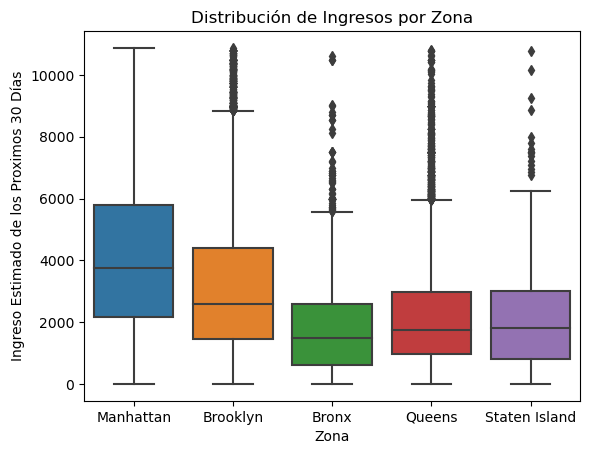

In [73]:
#Distribución de los ingresos estimados de Airbnb por Zona

q1 = df["revenue_30"].quantile(0.25)
q3 = df["revenue_30"].quantile(0.75)
rango_inter_cuartil = q3 - q1
sns.boxplot(df.loc[df["revenue_30"] <= (q3 + 1.5 * rango_inter_cuartil)], x='neighbourhood_group_cleansed', y='revenue_30')
plt.title('Distribución de Ingresos por Zona')
plt.xlabel('Zona')
plt.ylabel('Ingreso Estimado de los Proximos 30 Días')

In [38]:
# Ejemplos mas detallados de los ingresos por zona
aux=df.groupby('neighbourhood_group_cleansed')['revenue_30'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()
aux

,neighbourhood_group_cleansed,mean,median,min,max,std,count
0,Bronx,2017.828755,1518.0,0.0,105170.0,3330.340282,1711
1,Brooklyn,3607.705134,2700.0,0.0,281910.0,5140.807528,16343
2,Manhattan,6383.355443,4200.0,0.0,450000.0,11812.692467,18107
3,Queens,2674.073293,1770.0,0.0,1441920.0,18457.130480,6972
4,Staten Island,6734.942263,1800.0,0.0,1953450.0,93794.867588,433


In [49]:
# Barrios mas importantes en Manhattan
df[df['neighbourhood_group_cleansed']=='Manhattan'].groupby('neighbourhood_cleansed')['revenue_30'].mean().reset_index().sort_values(by='revenue_30',ascending=False)

,neighbourhood_cleansed,revenue_30
25,Theater District,14800.355721
26,Tribeca,14640.492891
23,SoHo,11746.816817
17,Midtown,8554.133237
19,Murray Hill,8451.260684
6,Financial District,8329.920863
31,West Village,7644.477583
9,Greenwich Village,7438.766520
1,Chelsea,7372.051190
20,NoHo,7243.050000


In [77]:
df['revenue_30'].mean()

4580.556305375751

Tipo de Cuarto

Text(0, 0.5, 'Ingreso Estimado de los Proximos 30 Días')

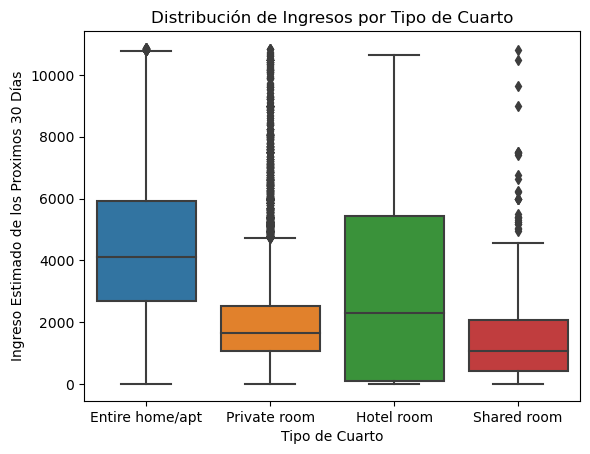

In [80]:
#Ingreso Estimado Por Zona y Tipo de Cuarto
q1 = df["revenue_30"].quantile(0.25)
q3 = df["revenue_30"].quantile(0.75)
rango_inter_cuartil = q3 - q1
sns.boxplot(df.loc[df["revenue_30"] <= (q3 + 1.5 * rango_inter_cuartil)], x='room_type', y='revenue_30')
plt.title('Distribución de Ingresos por Tipo de Cuarto')
plt.xlabel('Tipo de Cuarto')
plt.ylabel('Ingreso Estimado de los Proximos 30 Días')

In [39]:
aux=df.groupby('room_type')['revenue_30'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()
aux

,room_type,mean,median,min,max,std,count
0,Entire home/apt,5809.056919,4470.0,0.0,450000.0,8948.725317,24649
1,Hotel room,4169.000000,2527.0,0.0,31395.0,4992.475666,151
2,Private room,2989.393984,1720.0,0.0,1953450.0,19766.178520,18186
3,Shared room,2369.713793,1110.5,0.0,300000.0,12942.821225,580


Cantidad de Huespedes

Text(0, 0.5, 'Ingreso Estimado de los Proximos 30 Días')

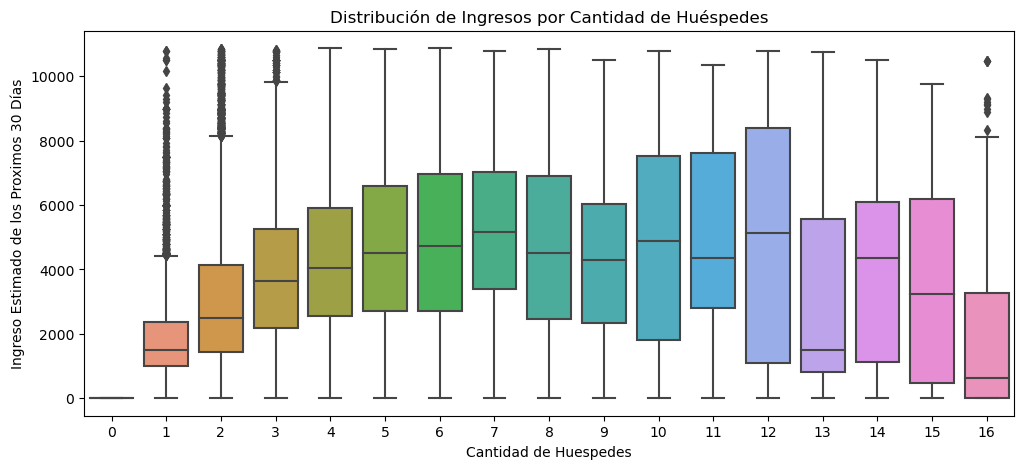

In [78]:
q1 = df["revenue_30"].quantile(0.25)
q3 = df["revenue_30"].quantile(0.75)
rango_inter_cuartil = q3 - q1
plt.figure(figsize=(12,5))
sns.boxplot(df.loc[df["revenue_30"] <= (q3 + 1.5 * rango_inter_cuartil)], x='accommodates', y='revenue_30')
plt.title('Distribución de Ingresos por Cantidad de Huéspedes')
plt.xlabel('Cantidad de Huespedes')

plt.ylabel('Ingreso Estimado de los Proximos 30 Días')

In [35]:
aux=df.groupby('accommodates')['revenue_30'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()
aux

,accommodates,mean,median,min,max,std,count
0,0,0.000000,0.0,0.0,0.0,0.000000,9
1,1,2341.533165,1500.0,0.0,1441920.0,18618.672673,7116
2,2,3582.436528,2550.0,0.0,1953450.0,15457.774513,19229
3,3,4237.377723,3750.0,0.0,281910.0,5562.205204,4085
4,4,5776.336891,4410.0,0.0,450000.0,11158.728074,6839
5,5,6186.315966,4980.0,0.0,210000.0,7650.080012,1785
6,6,7380.484026,5566.0,0.0,180000.0,8222.430644,2285
7,7,8377.945148,6090.0,0.0,195000.0,12461.879779,474
8,8,10981.698780,6900.0,0.0,76920.0,11700.588615,820
9,9,9068.514286,5580.0,0.0,75000.0,11489.471318,105


Cantidad de Cuartos

Text(0, 0.5, 'Ingreso Estimado de los Proximos 30 Días')

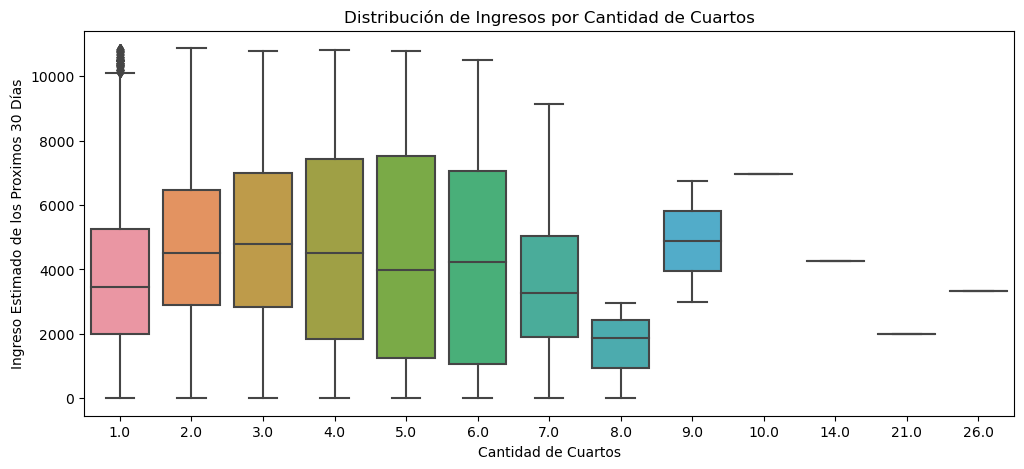

In [81]:
q1 = df["revenue_30"].quantile(0.25)
q3 = df["revenue_30"].quantile(0.75)
rango_inter_cuartil = q3 - q1
plt.figure(figsize=(12,5))
sns.boxplot(df.loc[df["revenue_30"] <= (q3 + 1.5 * rango_inter_cuartil)], x='bedrooms', y='revenue_30')
plt.title('Distribución de Ingresos por Cantidad de Cuartos')
plt.xlabel('Cantidad de Cuartos')

plt.ylabel('Ingreso Estimado de los Proximos 30 Días')

In [41]:
aux=df.groupby('bedrooms')['revenue_30'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()
aux

,bedrooms,mean,median,min,max,std,count
0,1.0,4493.200461,3600.0,0.0,300000.0,7547.400044,15170
1,2.0,6736.435095,5040.0,0.0,450000.0,11043.659677,6394
2,3.0,9225.274872,6000.0,0.0,195000.0,12148.362148,2543
3,4.0,14452.739943,7810.0,0.0,180000.0,20551.902785,696
4,5.0,12862.396450,8683.0,0.0,157500.0,20294.028185,169
5,6.0,11469.158730,10500.0,0.0,46241.0,9855.686338,63
6,7.0,16495.882353,14582.0,0.0,42000.0,14165.530267,17
7,8.0,18456.333333,10179.0,0.0,66000.0,25032.500488,6
8,9.0,21881.000000,22620.0,3000.0,39000.0,11376.409803,9
9,10.0,6960.000000,6960.0,6960.0,6960.0,NaN,1


Text(0, 0.5, 'Ingreso Estimado de los Proximos 30 Días')

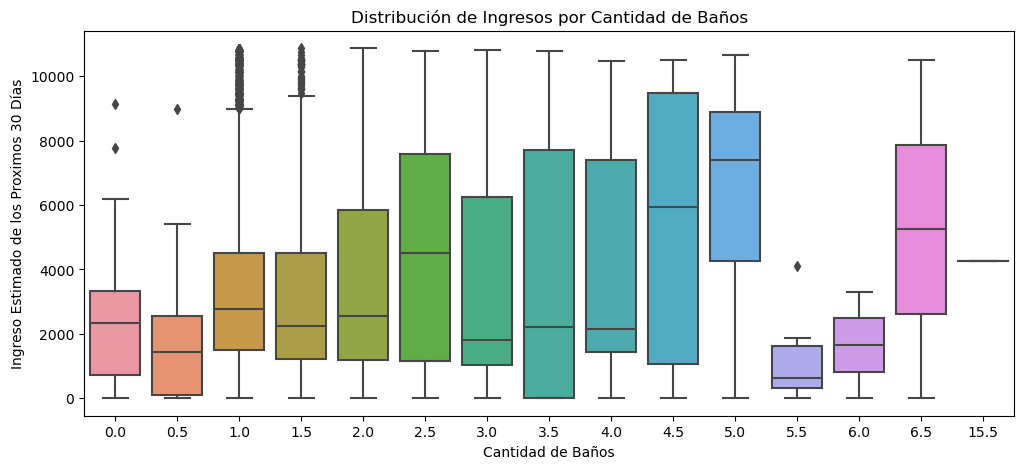

In [44]:
q1 = df["revenue_30"].quantile(0.25)
q3 = df["revenue_30"].quantile(0.75)
rango_inter_cuartil = q3 - q1
plt.figure(figsize=(12,5))
sns.boxplot(df.loc[df["revenue_30"] <= (q3 + 1.5 * rango_inter_cuartil)], x='banos_final', y='revenue_30')
plt.title('Distribución de Ingresos por Cantidad de Baños')
plt.xlabel('Cantidad de Baños')

plt.ylabel('Ingreso Estimado de los Proximos 30 Días')

In [79]:
aux=df.groupby('banos_final')['revenue_30'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()
aux

,banos_final,mean,median,min,max,std,count
0,0.0,2228.642398,2340.0,0.0,9150.0,1607.286897,467
1,0.5,3128.863636,1740.0,0.0,37500.0,5782.293780,88
2,1.0,3947.794483,2880.0,0.0,1953450.0,14791.707315,35452
3,1.5,4090.969176,2420.0,0.0,150000.0,5701.229981,1979
4,2.0,6854.922217,4028.0,0.0,450000.0,12705.925383,4204
5,2.5,9215.124016,7500.0,0.0,105000.0,9550.362519,508
6,3.0,17691.240506,9763.0,0.0,157500.0,22183.871890,474
7,3.5,16287.404040,14000.0,0.0,60000.0,12990.392379,99
8,4.0,31394.625000,17915.0,0.0,147900.0,31084.654706,160
9,4.5,17797.833333,11889.5,0.0,75000.0,18018.703710,36


Ahora exploramos variables multiples con las siguientes gráficas

<Axes: >

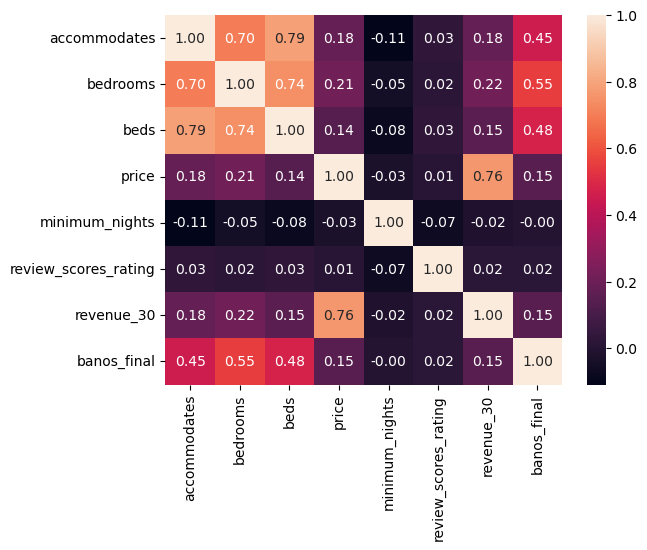

In [61]:
sns.heatmap(df[['accommodates','bedrooms','beds','price','minimum_nights','review_scores_rating','revenue_30','banos_final']].corr(),annot=True, fmt=".2f")

Las variables se comportan lógicamente, a mayor cantidad de huespedes, cuartos, camas, precio, rating, y baños se tiene una mayor correlación con los ingresos. Esto no implica causalidad, pero es algo importante a remarcar.

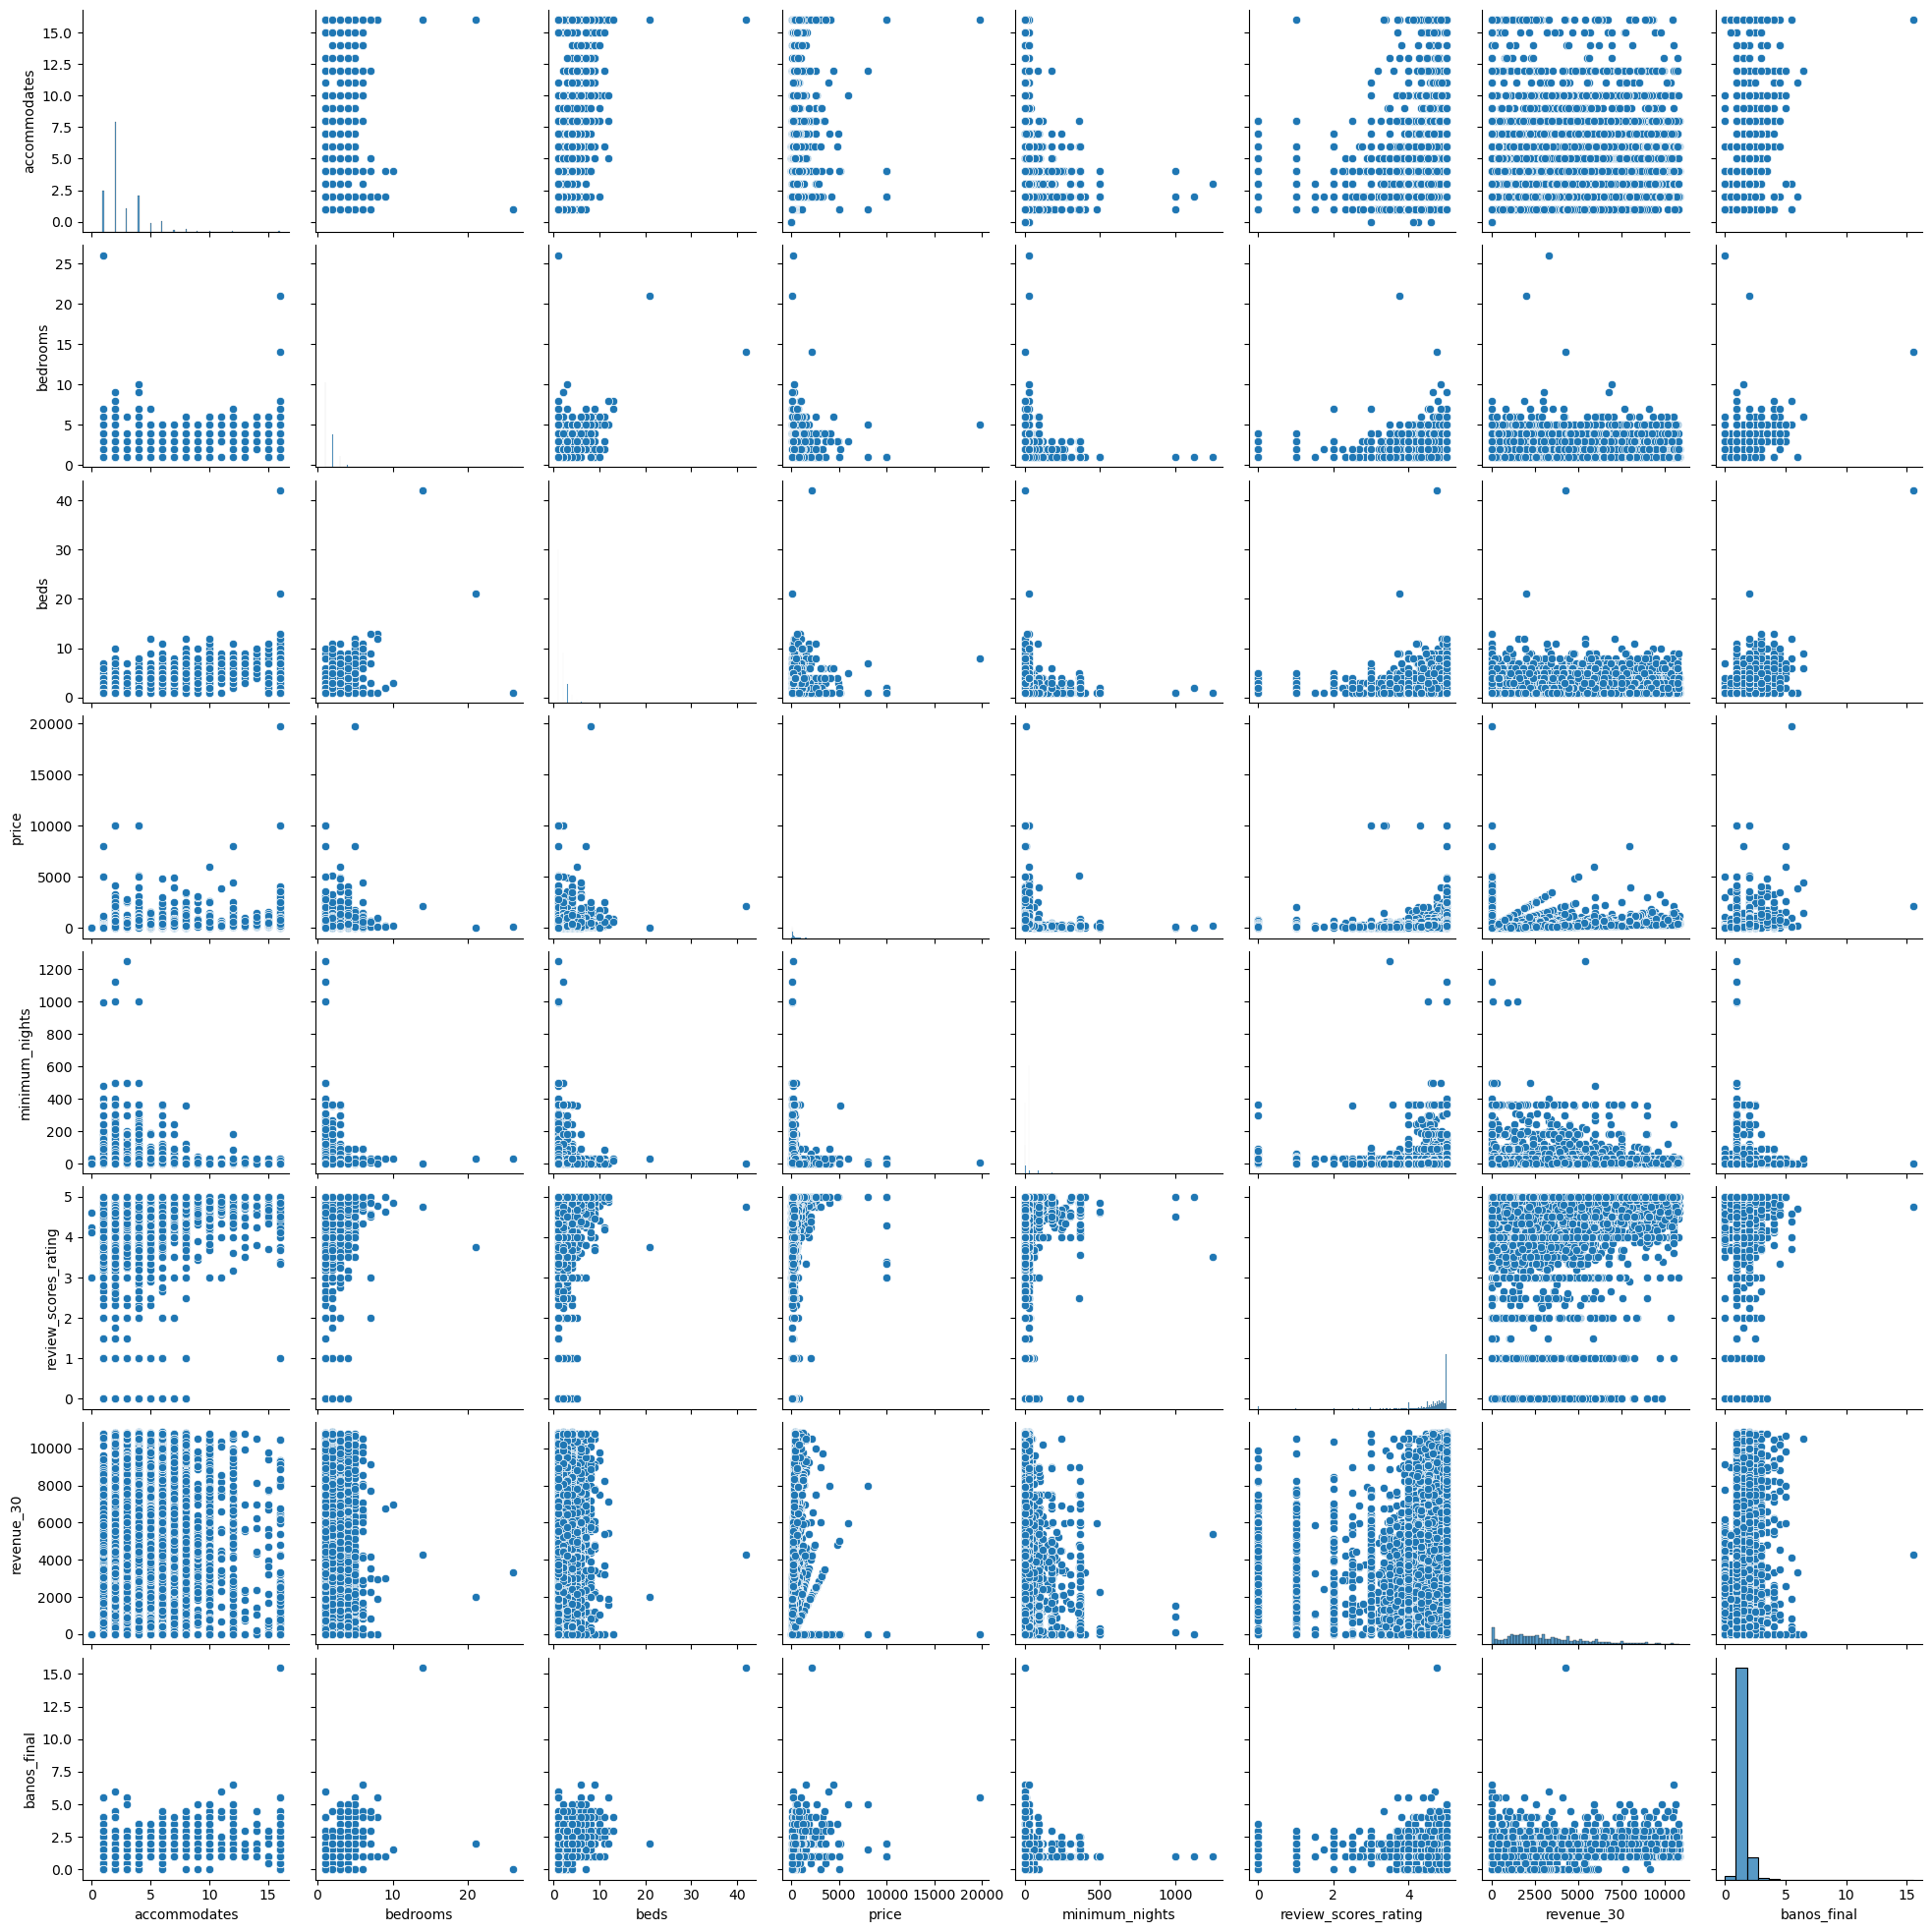

In [65]:
sns.pairplot(df.loc[df['revenue_30']<= (q3 + 1.5 * rango_inter_cuartil),['accommodates','bedrooms','beds','price','minimum_nights','review_scores_rating','revenue_30','banos_final']])

No hay mucho que se pueda concluir del pairplot previo. No hay ninguna variable muy relevante.

In [76]:
#Precios en Manhattan
df.loc[df['neighbourhood_group_cleansed']=='Manhattan',['price']].describe()

,price
count,18107.000000
mean,307.315955
std,699.058373
min,0.000000
25%,114.000000
50%,187.000000
75%,320.000000
max,59386.000000
